In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdChemReactions

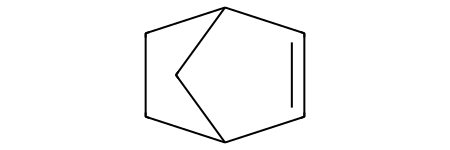

In [2]:
rop_smiles = "C1=CC2CCC1C2"
#romp_smiles='CCOC(=O)C(C#N)c1ccc(C(C#N)C(=O)OCC)c2occc12'
dp0 = Chem.MolFromSmiles(rop_smiles)
dp0

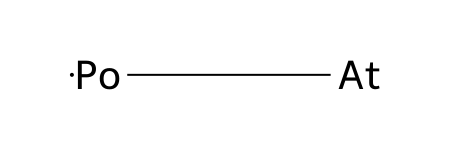

In [3]:
helper = Chem.MolFromSmiles("[Po]-[At]")
helper

### Initiation (romp)

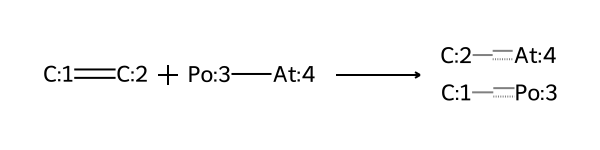

In [4]:
initiation = rdChemReactions.ReactionFromSmarts(
        "([C:1]=[C:2]).[Po:3]-[At:4]>>([C:1][Po:3].[C:2][At:4])"
    )
initiation

In [126]:
"""initiation = rdChemReactions.ReactionFromSmarts(
        "([*:1]@[*:2]).[Po:3]-[At:4]>>([*:1][Po:3].[*:2][At:4])"
    )
initiation"""

'initiation = rdChemReactions.ReactionFromSmarts(\n        "([*:1]@[*:2]).[Po:3]-[At:4]>>([*:1][Po:3].[*:2][At:4])"\n    )\ninitiation'

In [5]:
# first step (dp 0 to dp 1)
dp1 = initiation.RunReactants((dp0, helper))[0][0]
#len(dp1)

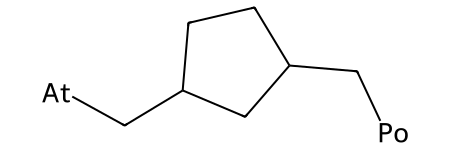

In [6]:
dp1

### Propagation reaction (should work for everything)

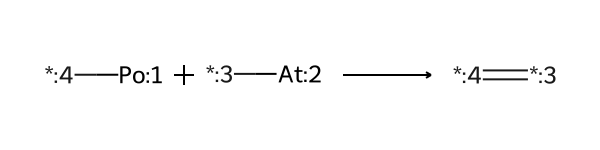

In [7]:
prop = rdChemReactions.ReactionFromSmarts(
    "[*:4]-[Po:1].[At:2]-[*:3]>>[*:4]=[*:3]"
)
prop

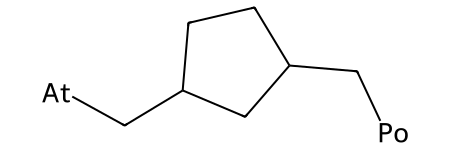

In [8]:
dp1

In [9]:
products = [item[0] for item in prop.RunReactants((dp1, dp1))]
products

[23:37:48] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 1 2 


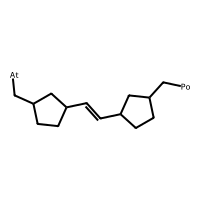

In [10]:
from rdkit.Chem.Draw import MolsToGridImage
MolsToGridImage(products, molsPerRow=1)

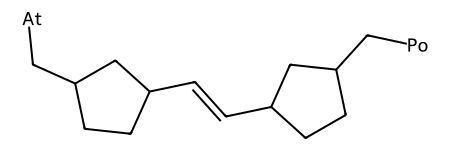

In [14]:
dp2 = products[0]
dp2

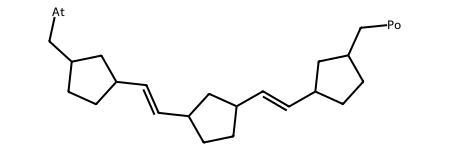

In [35]:
dp3 = prop.RunReactants((dp1, dp2))[0][0]
dp3

### Replace end groups with CH3s

In [36]:
replaceAt = rdChemReactions.ReactionFromSmarts(
    "[At:1]>>[C:1]"
)
replacePo = rdChemReactions.ReactionFromSmarts(
    "[Po:1]>>[C:1]"
)

In [37]:
replaceAt.RunReactantInPlace(dp3)

True

In [38]:
replacePo.RunReactantInPlace(dp3)

True

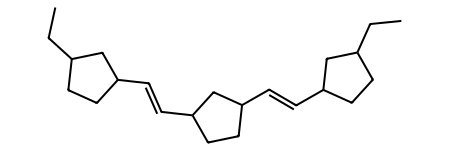

In [58]:
dp3

### hydrogen abstract

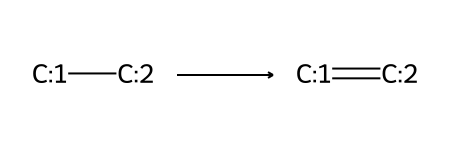

In [ ]:
term1 = rdChemReactions.ReactionFromSmarts(
    "[CX1:1]-[C:2]>>[CX1:1]=[C:2]"
)
term1



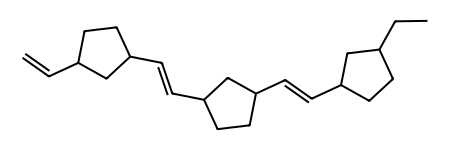

In [63]:
prod=term1.RunReactants((dp3,))

prod[0][0]
#prod[1][0]

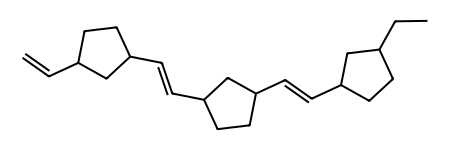

In [65]:
prod1=prod[0][0]

prod1

In [66]:
finalprod=term1.RunReactants((prod1,))

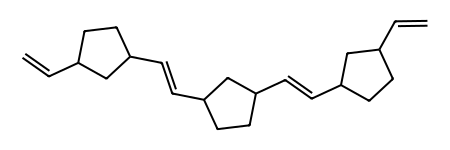

In [68]:
finalprod[0][0]